<h3> Support Vector Machine (SVM)

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression).

<h5> Import Library

-Library Numpyberfungsi untuk mengolah data dalam bentuk angka (array).

-Library Matplotlib berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami.


-Library Pandas Berfungsi untuk membaca file dataset dalam bentuk .CSV.

-Library Seaborn berfungsi untuk membantu visualisasi dataset.

In [6]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set
%matplotlib inline

import pickle

<h5> Data Prepare

Sumber : https://www.kaggle.com/prathamtripathi/drug-classification

In [11]:
dataee = pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
dataee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
dataee.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


<h5> Visualisasi Data Dalam Bentuk Plot

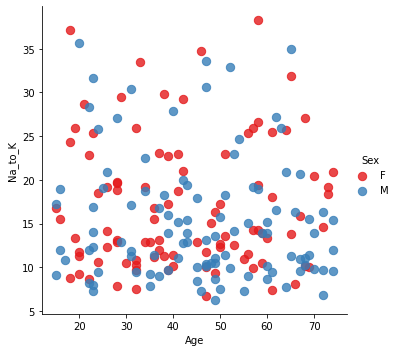

In [16]:
sns.lmplot('Age', 'Na_to_K', data=dataee, hue='Sex',palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [17]:
model = svm.SVC(kernel='linear') #menggunakan kernel linear
X = sp[['Age','Na_to_K']]
y = sp['Sex']
model.fit (X,y)

SVC(kernel='linear')

In [18]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

<h4>Hasil :

Text(0, 0.5, 'Na_to_K')

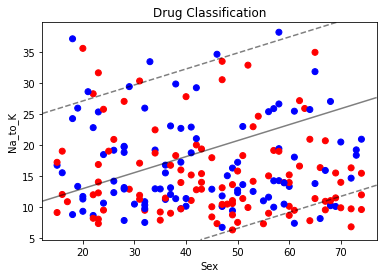

In [19]:
colors = {'F' : 'b', 'M': 'r'}
plt.scatter(sp['Age'], sp['Na_to_K'],c=[colors[r] for r in sp['Sex']])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1],30)
yy = np.linspace(ylim[0], ylim[1],30)
XX,YY = np.meshgrid(xx,yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
                 
ax.contour(XX,YY,Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
ax.set_title('Drug Classification')
ax.set_xlabel('Sex')
ax.set_ylabel('Na_to_K')

<h3> PAIRPLOT

Untuk membuat hubungan antar variabel, membuat sebuah sumbu variabel numerik yang di bagi menjadi sumbu y dan x, serta untuk analisis yang digunakan.

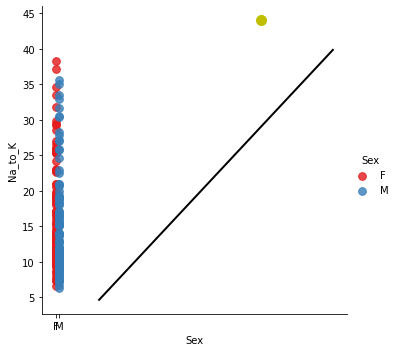

In [21]:
sns.lmplot('Sex', 'Na_to_K', data=sp, hue='Sex', palette='Set1', fit_reg=False, scatter_kws={"s": 60})
plt.plot(xx, yy, linewidth=2, color='k')
plt.plot(57,44, 'yo', markersize='10');

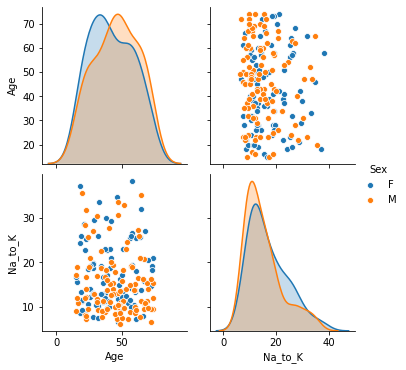

In [22]:
import seaborn as sn
sn.pairplot(sp,hue='Sex')

<h3> Train Split Dataset test

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.6, random_state=5, shuffle=True)
model.fit(x_train, y_train)

SVC(kernel='linear')

In [24]:
y1_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y1_pred, y_test)

0.5583333333333333

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_pred, y_test)

array([[22, 16],
       [37, 45]], dtype=int64)

<h3>Confusion matrix

adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

- True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

- Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

- Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

- Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah)..

# Kesimpulan

Klasifikasi Pada dataset Drug ini menggunakan kernel "LINEAR" 
Model yang umum digunakan untuk menyelesaikan masalah klasifikasi dan regresi adalah model linear, yaitu model yang merupakan kombinasi linear dari fungsi basis:

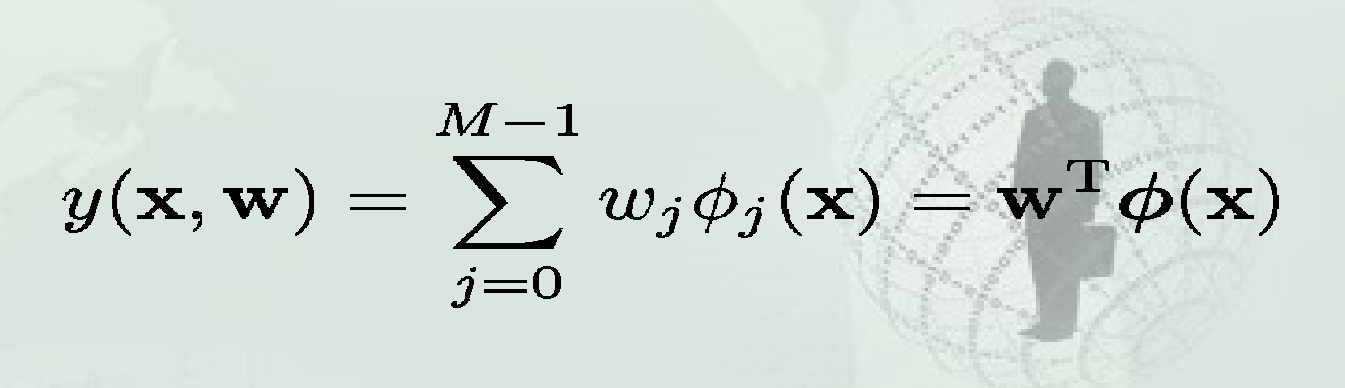

Model linear memiliki sifat-sifat yang penting baik dari aspek
komputasi maupun analitik. Penggunaan model linear dengan
pendekatan parametrik pada metode klasik memiliki keterbatasan
pada aplikasi praktis disebabkan oleh kutukan dimensi (curse of
dimensionality)

Dasarnya adalah bahwa data real biasanya memiliki sifat mulus,
artinya perubahan sedikit pada data input hanya akan memberikan
sedikit perubahan pada output

Penggunaan fungsi kernel sebagai fungsi basis adalah salah satu
contoh pendekatan seperti ini yang banyak digunakan saat ini.